Quick fix to ensure this works on my macbook

In [1]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [2]:
from fastai.data.all import *
from fastai.vision.all import *

In [3]:
df = pd.read_csv('train.csv')
print(df.head())

                               fname                   labels
0  cards/Director_Krennic_Normal.jpg  Director_Krennic Normal
1       cards/Iden_Versio_Normal.jpg       Iden_Versio Normal
2         cards/Chewbacca_Normal.jpg         Chewbacca Normal
3      cards/Chirrut_Îmwe_Normal.jpg      Chirrut_Îmwe Normal
4    cards/Luke_Skywalker_Normal.jpg    Luke_Skywalker Normal


In [4]:
def card_splitter(df):
    # Create a dictionary to store the indices of each unique card
    card_indices = {}
    for i, row in df.iterrows():
        card_name = row['fname'].split('/')[-1].split('_')[0]  # Extract the card name from the filename
        if card_name not in card_indices:
            card_indices[card_name] = []
        card_indices[card_name].append(i)

    # Split the indices into train and valid sets
    train_indices = []
    valid_indices = []
    for indices in card_indices.values():
        train_idx, valid_idx = RandomSplitter(valid_pct=.99, seed=42)(indices)
        train_indices.extend(train_idx)
        valid_indices.extend(valid_idx)

    return train_indices, valid_indices

In [5]:
def no_splitter(items):
    # Return all indices for training, and an empty list for validation
    return L(range(len(items))), L([])

In [6]:
cards = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=no_splitter,
                   get_x=lambda o:''+o.fname,
                   get_y=lambda o:o.labels.split(),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

dls = cards.dataloaders(df)
dls.show_batch()

FileNotFoundError: [Errno 2] No such file or directory: 'cards/Director_Krennic_Normal.jpg'

In [7]:
dls = cards.dataloaders(df)
dls.show_batch()

FileNotFoundError: [Errno 2] No such file or directory: 'cards/Director_Krennic_Normal.jpg'

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.060734,None,None,00:05


/opt/homebrew/Caskroom/miniconda/base/envs/fastai_env/lib/python3.8/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,1.032310,None,None,00:07
1,1.016577,None,None,00:06
2,1.001896,None,None,00:06
3,0.988306,None,None,00:06


SuggestedLRs(valley=0.001737800776027143)

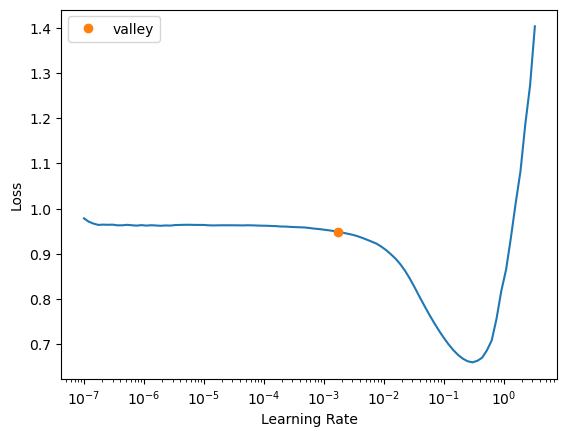

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(2, 3e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.881494,None,None,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.346642,None,None,00:06
1,0.207276,None,None,00:06
